In [1]:
# Preparing packages and libararies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.interpolate import make_interp_spline
import matplotlib.patches as patches
import random
import os

import umap
import seaborn as sns

In [2]:
os.chdir('../..')
os.chdir('./data')

In [8]:
pwd

'c:\\Users\\user\\Desktop\\Proposal\\Experiments\\Moral_Ultimatum_Game_Analysis\\article1\\publication\\data'

In [31]:
### A melted dataframe which contains reward, emotions before and after offer as well as their prediction errors, participant groupings
dataframe_melt = pd.read_csv("emotion_alltime_melt_N476.csv")

In [14]:
dataframe_melt.columns

Index(['Unnamed: 0', 'time_point', 'participant', 'rewexpect_group', 'RPRE',
       'rewaccept_group', 'acceptance', 'emotion_experience_group', 'VPOST',
       'APOST', 'FPOST', 'DPOST', 'VPRE', 'APRE', 'FPRE', 'DPRE',
       'reward_given', 'RPE', 'VPE', 'APE', 'FPE', 'DPE'],
      dtype='object')

In [32]:
dataframe_melt.iloc[:, 8:12]

,VPOST,APOST,FPOST,DPOST
0,-221,56,-3,1
1,204,35,3,3
2,-213,-66,-4,-4
3,-168,-24,-2,-4
4,-161,-3,-3,-3
...,...,...,...,...
14275,-41,22,-2,-2
14276,-53,32,-1,0
14277,-247,-249,-4,-4
14278,-240,-1,-4,1


c:\Users\user\anaconda3\envs\jaewonml\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


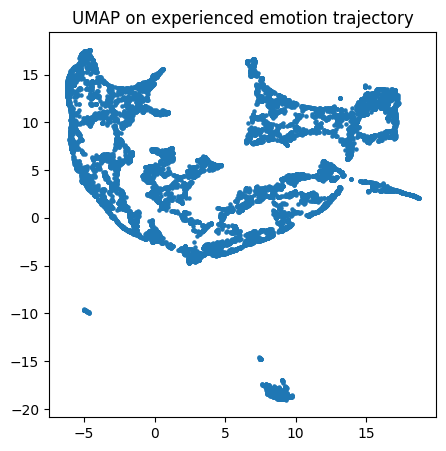

In [33]:
### UMAP embedding of experienced emotion trajectories (Prepare for Fig 2G)
random.seed(42)
umap_embedder_experience = umap.UMAP(n_neighbors = 100, n_components = 2, n_jobs = -1, random_state = 39)
emotion_trajectory_umap_experience = umap_embedder_experience.fit_transform(dataframe_melt.iloc[:, 8:12])
plt.figure(figsize = (5,5))
plt.scatter(x = emotion_trajectory_umap_experience[:,0], y = emotion_trajectory_umap_experience[:,1], s = 5)
plt.title("UMAP on experienced emotion trajectory")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


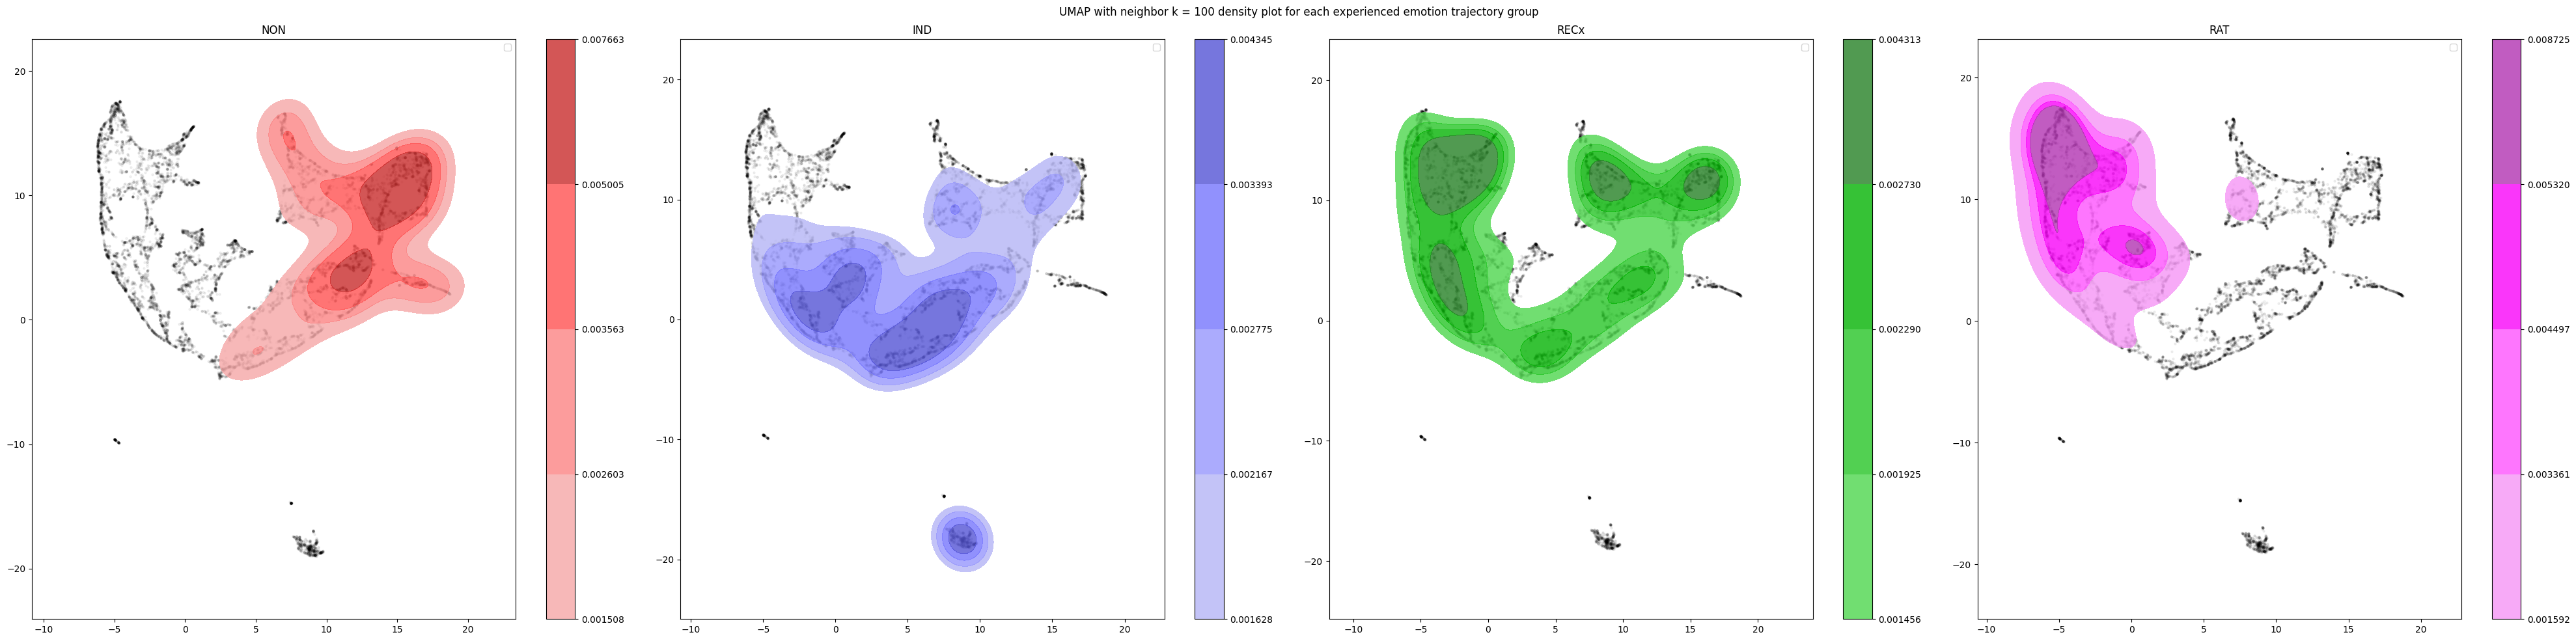

In [34]:
### Figure 4A
### Drawing index of experienced emotion group from melted dataframe
group1_index_experience = dataframe_melt[dataframe_melt["emotion_experience_group"] == 0].index
group2_index_experience = dataframe_melt[dataframe_melt["emotion_experience_group"] == 1].index
group3_index_experience = dataframe_melt[dataframe_melt["emotion_experience_group"] == 2].index
group4_index_experience = dataframe_melt[dataframe_melt["emotion_experience_group"] == 3].index

plt.figure(figsize=(40, 10))
plt.subplot(1, 4, 1)
plt.scatter(x = emotion_trajectory_umap_experience[:,0], y = emotion_trajectory_umap_experience[:,1], s = 5, c = 'k', alpha = 0.05)
sns.kdeplot(x = emotion_trajectory_umap_experience[group1_index_experience,0], y = emotion_trajectory_umap_experience[group1_index_experience,1], gridsize = 600, color = 'red', fill = True, cbar = True, levels = 5, thresh = .3, alpha = 0.8)
plt.legend()
plt.title("NON")


plt.subplot(1, 4, 2)
plt.scatter(x = emotion_trajectory_umap_experience[:,0], y = emotion_trajectory_umap_experience[:,1], s = 5, c = 'k', alpha = 0.05)
sns.kdeplot(x = emotion_trajectory_umap_experience[group2_index_experience,0], y = emotion_trajectory_umap_experience[group2_index_experience,1], gridsize = 600, color = 'blue', fill = True, cbar = True, levels = 5, thresh = .3, alpha = 0.8)
plt.legend()
plt.title("IND")

plt.subplot(1, 4, 3)
plt.scatter(x = emotion_trajectory_umap_experience[:,0], y = emotion_trajectory_umap_experience[:,1], s = 5, c = 'k', alpha = 0.05)
sns.kdeplot(x = emotion_trajectory_umap_experience[group3_index_experience,0], y = emotion_trajectory_umap_experience[group3_index_experience,1], gridsize = 600, color = 'green', fill = True, cbar = True, levels = 5, thresh = .3, alpha = 0.8)
plt.legend()
plt.title("RECx")

plt.subplot(1, 4, 4)
plt.scatter(x = emotion_trajectory_umap_experience[:,0], y = emotion_trajectory_umap_experience[:,1], s = 5, c = 'k', alpha = 0.05)
sns.kdeplot(x = emotion_trajectory_umap_experience[group4_index_experience,0], y = emotion_trajectory_umap_experience[group4_index_experience,1], gridsize = 600, color = 'magenta', fill = True, cbar = True, levels = 5, thresh = .3, alpha = 0.8)
plt.legend()
plt.title("RAT")

plt.suptitle("UMAP with neighbor k = 100 density plot for each experienced emotion trajectory group")
plt.tight_layout()
plt.show()

In [35]:
dataframe_melt.columns

Index(['Unnamed: 0', 'time_point', 'participant', 'rewexpect_group', 'RPRE',
       'rewaccept_group', 'acceptance', 'emotion_experience_group', 'VPOST',
       'APOST', 'FPOST', 'DPOST', 'VPRE', 'APRE', 'FPRE', 'DPRE',
       'reward_given', 'RPE', 'VPE', 'APE', 'FPE', 'DPE'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


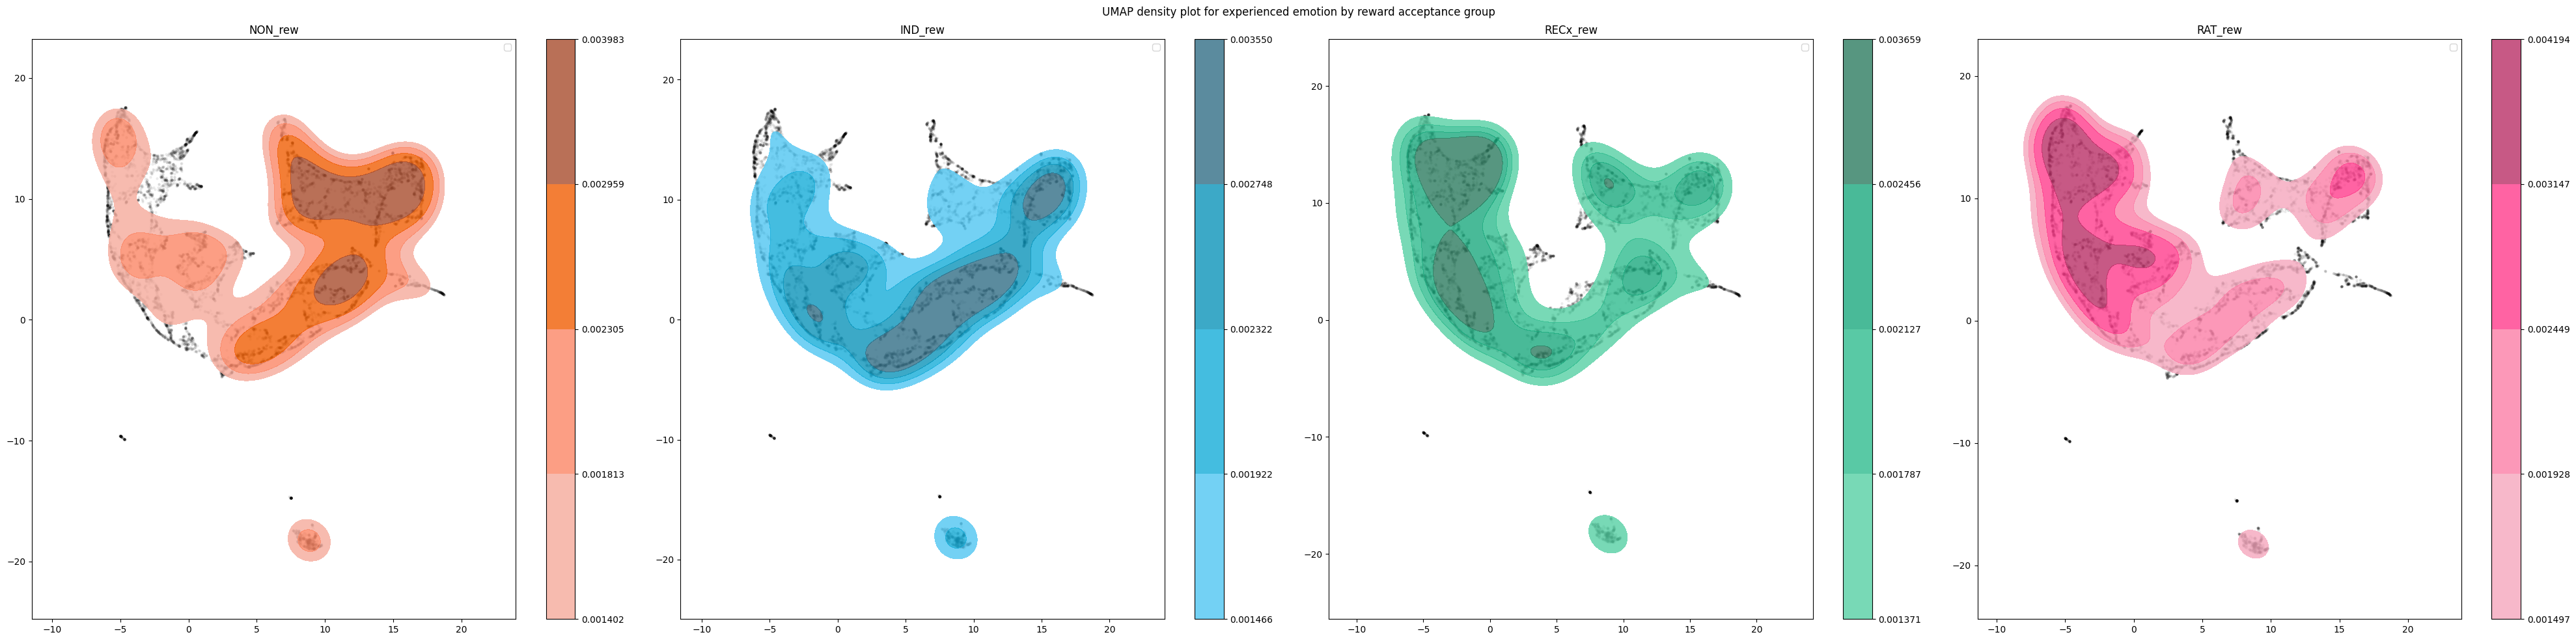

In [36]:
### Figure 4B
group1_index_rewacc = dataframe_melt[dataframe_melt["rewaccept_group"] == 1].index # NON
group2_index_rewacc = dataframe_melt[dataframe_melt["rewaccept_group"] == 3].index # IND
group3_index_rewacc = dataframe_melt[dataframe_melt["rewaccept_group"] == 2].index # RECx
group4_index_rewacc = dataframe_melt[dataframe_melt["rewaccept_group"] == 4].index # RAT

color_autumn = plt.cm.autumn(100)
color_cool = plt.cm.cool(50)
color_summer = plt.cm.summer(20)
color_spring = plt.cm.spring(100)
plt.figure(figsize=(40, 10))
plt.subplot(1, 4, 1)
plt.scatter(x = emotion_trajectory_umap_experience[:,0], y = emotion_trajectory_umap_experience[:,1], s = 5, c = 'k', alpha = 0.05)
sns.kdeplot(x = emotion_trajectory_umap_experience[group1_index_rewacc,0], y = emotion_trajectory_umap_experience[group1_index_rewacc,1], gridsize = 600, color = color_autumn, fill = True, cbar = True, levels = 5, thresh = .3, alpha = 0.8)
plt.legend()
plt.title("NON_rew")

plt.subplot(1, 4, 2)
plt.scatter(x = emotion_trajectory_umap_experience[:,0], y = emotion_trajectory_umap_experience[:,1], s = 5, c = 'k', alpha = 0.05)
sns.kdeplot(x = emotion_trajectory_umap_experience[group2_index_rewacc,0], y = emotion_trajectory_umap_experience[group2_index_rewacc,1], gridsize = 600, color = color_cool, fill = True, cbar = True, levels = 5, thresh = .3, alpha = 0.8)
plt.legend()
plt.title("IND_rew")

plt.subplot(1, 4, 3)
plt.scatter(x = emotion_trajectory_umap_experience[:,0], y = emotion_trajectory_umap_experience[:,1], s = 5, c = 'k', alpha = 0.05)
sns.kdeplot(x = emotion_trajectory_umap_experience[group3_index_rewacc,0], y = emotion_trajectory_umap_experience[group3_index_rewacc,1], gridsize = 600, color = color_summer, fill = True, cbar = True, levels = 5, thresh = .3, alpha = 0.8)
plt.legend()
plt.title("RECx_rew")

plt.subplot(1, 4, 4)
plt.scatter(x = emotion_trajectory_umap_experience[:,0], y = emotion_trajectory_umap_experience[:,1], s = 5, c = 'k', alpha = 0.05)
sns.kdeplot(x = emotion_trajectory_umap_experience[group4_index_rewacc,0], y = emotion_trajectory_umap_experience[group4_index_rewacc,1], gridsize = 600, color = color_spring, fill = True, cbar = True, levels = 5, thresh = .3, alpha = 0.8)
plt.legend()
plt.title("RAT_rew")

plt.suptitle("UMAP density plot for experienced emotion by reward acceptance group")
plt.tight_layout()
plt.show()

In [37]:
### Raw data for figure S9
### Emotion Classification Task response raw data
emotions_valence_imp = pd.read_csv("emotions_valence_imp.csv")
emotions_arousal_imp = pd.read_csv("emotions_arousal_imp.csv")
emotions_focus_imp = pd.read_csv("emotions_focus_imp.csv")
emotions_dominance_imp = pd.read_csv("emotions_dominance_imp.csv")

emotions_valence_imp = emotions_valence_imp.drop(["Unnamed: 0"], axis = 1)
emotions_arousal_imp = emotions_arousal_imp.drop(["Unnamed: 0"], axis = 1)
emotions_focus_imp = emotions_focus_imp.drop(["Unnamed: 0"], axis = 1)
emotions_dominance_imp = emotions_dominance_imp.drop(["Unnamed: 0"], axis = 1)

### Participant consent
agree_index_emo = pd.read_csv("agree_index_emo.csv")
agree_index_emo = agree_index_emo[agree_index_emo.iloc[:, -1] == 1]
agree_index_emo_ = agree_index_emo.index
agree_index_emo_

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            533, 534, 535, 537, 538, 539, 541, 542, 544, 545],
           dtype='int64', length=476)

In [38]:
### Make each label's affect dimension as separate dataframe : coord1 ~ coord18 containing valence, arousal, focus, dominance for each label
for i in range(18):
    i_valence = pd.DataFrame(emotions_valence_imp.iloc[agree_index_emo_, i])
    i_arousal = pd.DataFrame(emotions_arousal_imp.iloc[agree_index_emo_, i])
    i_focus = pd.DataFrame(emotions_focus_imp.iloc[agree_index_emo_, i])
    i_dominance = pd.DataFrame(emotions_dominance_imp.iloc[agree_index_emo_, i])
    i_all = pd.concat([i_valence, i_arousal, i_focus, i_dominance], axis = 1)
    globals()["coord_{}".format(i+1)] = i_all

C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_data.iloc[:,0], hist = False, kde = True, rug = True, bins = 501, color = color, norm_hist = True, label = Emotion_name[i + 9], ax = axes[i], kde_kws={"clip": (-250, 250)})
C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(['', '0.005', '0.010'])
C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.

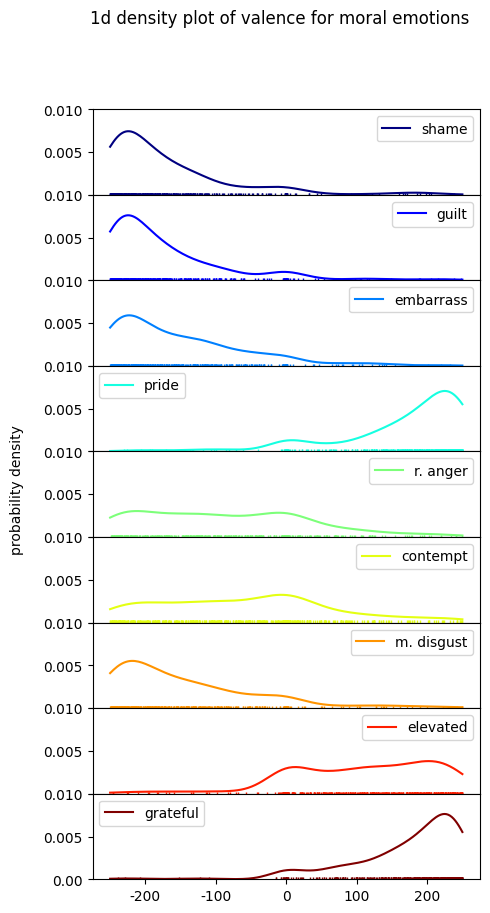

C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_data.iloc[:,1], hist = False, kde = True, rug = True, bins = 501, color = color, norm_hist = True, label = Emotion_name[i + 9], ax = axes[i], kde_kws={"clip": (-250, 250)})
C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(['', '0.005', '0.010'])
C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.

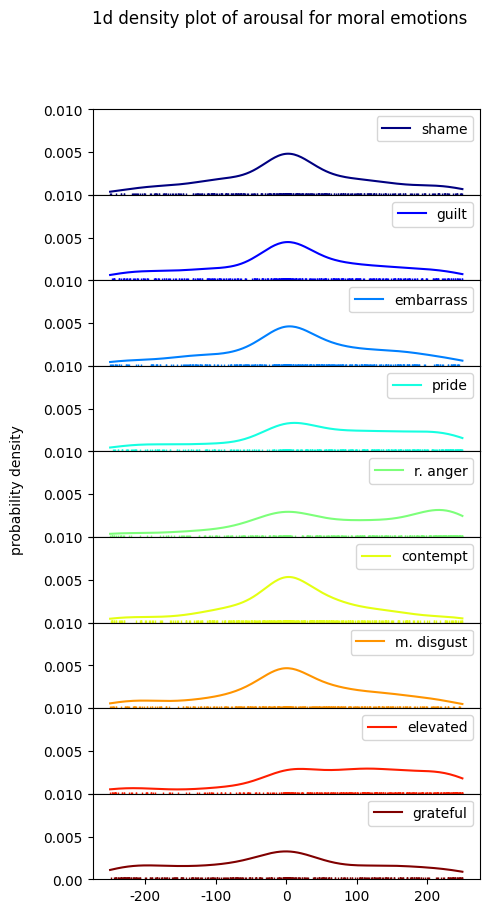

C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:56: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_data.iloc[:,2], hist = True, kde = True, rug = False, bins = 9, color = color, norm_hist = True, label = Emotion_name[i + 9], ax = axes[i], kde_kws={"clip": (-250, 250)})
C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:56: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the 

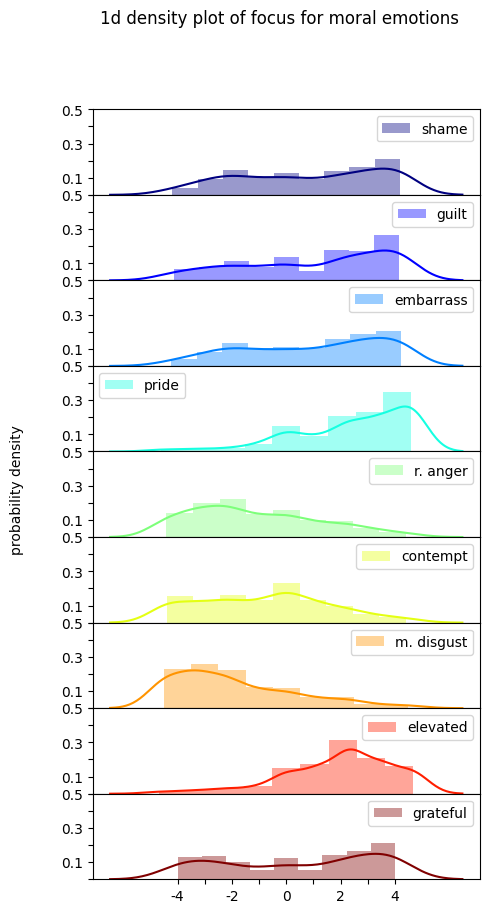

C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_data.iloc[:,3], hist = True, kde = True, rug = False, bins = 9, color = color, norm_hist = True, label = Emotion_name[i + 9], ax = axes[i], kde_kws={"clip": (-250, 250)})
C:\Users\user\AppData\Local\Temp\ipykernel_31140\3394797702.py:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the 

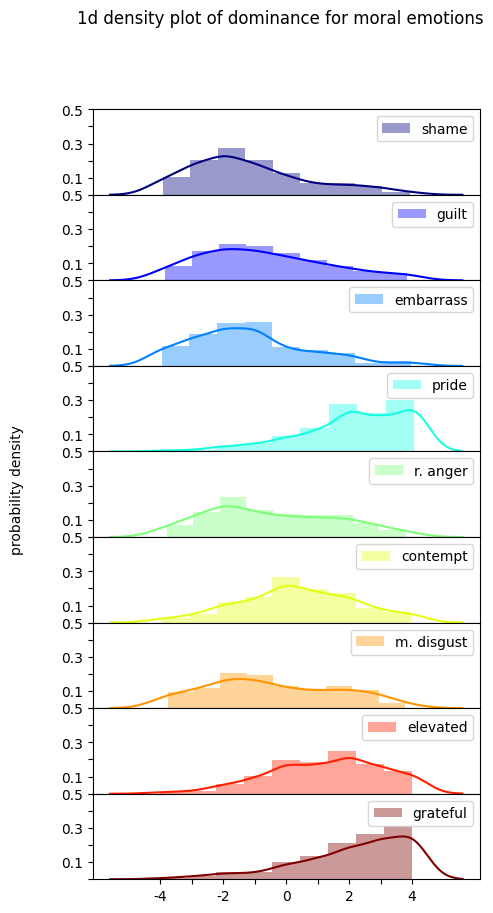

In [39]:
### Figure S9
unique_labels = np.arange(9) + 1
heffner_labels = [1, 2, 4, 5, 6, 7, 8, 9]
basic_labels = [1, 2, 3, 4, 5, 6]
moral_labels = np.arange(10,19)
all_labels = np.arange(18) + 1

Emotion_name = ['happy', 'sad', 'afraid', 'disgust', 'angry', 'surprise', 'satisfied', 'relaxed', 'sleepy', 'shame', 'guilt', 'embarrass', 'pride', 'r. anger', 'contempt', 'm. disgust', 'elevated', 'grateful']

import matplotlib.colors as mcolors
colors_moral = plt.cm.jet(np.linspace(0, 1, 9))
color_dict_moral = dict(zip(moral_labels, colors_moral))

fig, axes = plt.subplots(9, 1, figsize = (5, 10))
for i in range(9):
    label_data = globals()["coord_{}".format(i + 10)]
    color = mcolors.to_hex(color_dict_moral[i + 10])
    sns.distplot(label_data.iloc[:,0], hist = False, kde = True, rug = True, bins = 501, color = color, norm_hist = True, label = Emotion_name[i + 9], ax = axes[i], kde_kws={"clip": (-250, 250)})
    axes[i].set_ylim([0, 0.01])
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels(['', '0.005', '0.010'])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend()
    plt.suptitle("1d density plot of valence for moral emotions")
axes[8].set_xticks(np.arange(-200, 201, 100))
axes[8].set_xticklabels([-200, -100, 0, 100, 200])
axes[8].set_yticklabels(['0.00', '0.005', '0.010'])
fig.text(-0.04, 0.5, 'probability density', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0)
plt.show()

fig, axes = plt.subplots(9, 1, figsize = (5, 10))
for i in range(9):
    label_data = globals()["coord_{}".format(i + 10)]
    color = mcolors.to_hex(color_dict_moral[i + 10])
    sns.distplot(label_data.iloc[:,1], hist = False, kde = True, rug = True, bins = 501, color = color, norm_hist = True, label = Emotion_name[i + 9], ax = axes[i], kde_kws={"clip": (-250, 250)})
    axes[i].set_ylim([0, 0.01])
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels(['', '0.005', '0.010'])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend()
    plt.suptitle("1d density plot of arousal for moral emotions")
axes[8].set_xticks(np.arange(-200, 201, 100))
axes[8].set_xticklabels([-200, -100, 0, 100, 200])
axes[8].set_yticklabels(['0.00', '0.005', '0.010'])
fig.text(-0.04, 0.5, 'probability density', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0)
plt.show()

fig, axes = plt.subplots(9, 1, figsize = (5, 10))
for i in range(9):
    label_data = globals()["coord_{}".format(i + 10)]
    color = mcolors.to_hex(color_dict_moral[i + 10])
    sns.distplot(label_data.iloc[:,2], hist = True, kde = True, rug = False, bins = 9, color = color, norm_hist = True, label = Emotion_name[i + 9], ax = axes[i], kde_kws={"clip": (-250, 250)})
    axes[i].set_ylim([0, 0.5])
    axes[i].set_xticklabels([])
    axes[i].set_yticks(np.arange(0, 0.6, 0.1))
    axes[i].set_yticklabels(['', '0.1', '', '0.3', '', '0.5'])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend()
    plt.suptitle("1d density plot of focus for moral emotions")
axes[8].set_xticks(np.arange(-4, 5, 1))
axes[8].set_xticklabels(['-4', '', '-2', '', '0', '', '2', '', '4'])
axes[8].set_yticks(np.arange(0, 0.6, 0.1))
axes[8].set_yticklabels(['', '0.1', '', '0.3', '', '0.5'])
fig.text(-0.04, 0.5, 'probability density', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0)
plt.show()

fig, axes = plt.subplots(9, 1, figsize = (5, 10))
for i in range(9):
    label_data = globals()["coord_{}".format(i + 10)]
    color = mcolors.to_hex(color_dict_moral[i + 10])
    sns.distplot(label_data.iloc[:,3], hist = True, kde = True, rug = False, bins = 9, color = color, norm_hist = True, label = Emotion_name[i + 9], ax = axes[i], kde_kws={"clip": (-250, 250)})
    axes[i].set_ylim([0, 0.5])
    axes[i].set_xticklabels([])
    axes[i].set_yticks(np.arange(0, 0.6, 0.1))
    axes[i].set_yticklabels(['', '0.1', '', '0.3', '', '0.5'])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend()
    plt.suptitle("1d density plot of dominance for moral emotions")
axes[8].set_xticks(np.arange(-4, 5, 1))
axes[8].set_xticklabels(['-4', '', '-2', '', '0', '', '2', '', '4'])
axes[8].set_yticks(np.arange(0, 0.6, 0.1))
axes[8].set_yticklabels(['', '0.1', '', '0.3', '', '0.5'])
fig.text(-0.04, 0.5, 'probability density', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0)
plt.show()